# Классификация: Логистическая регрессия и SVM

### Цель
изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

### Описание задания
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. 
Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

### Этапы работы

- Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
- Проведите первичный анализ.
- Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками
- Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
- Преобразуйте категориальные признаки.
- Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
- Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
- Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

### Сформулируйте выводы по проделанной работе
- Кратко опишите какие преобразования были сделаны с данными.
- Сравните точность двух моделей.
- Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?

___
Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

### Результат: 
получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.

### Форма выполнения: 
ссылка на Jupyter Notebook, загруженный на GitHub; ссылка на Google Colab; файл с расширением .ipynb.

### Инструменты: 
Jupyter Notebook/Google Colab; GitHub.

### Срок выполнения: 
7 календарных дней

*Рекомендации к выполнению:
Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#######################################
# Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
#######################################
data = pd.read_csv( 'adult.csv' )

#######################################
# Проведите первичный анализ
#######################################
# Вначале изучил этот документ: http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html
# Ну а теперь - вольные эксперименты:

data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()
# Видно, что мы имеем в этом датасете "разношерстный" набор данных. Часть из них - параметрические, часть - категориальные
# Далее проверим каждую из колонок на наличие пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# Сразу зафиксируем текущее количество строк в датафрейме. Пригодится потом
data_start_cnt = data.age.count()

data.describe()
# Видим, что колонки age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week - параметрические,
# пропусков не содержат (количество строк с живыми данными по каждой из колонок совпадает и равно 48842)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Попытка отсортировать датасет по возрасту, чтобы под другим углом посмотреть на данные. На данном этапе это преждевременно.
#data.sort_values(['age'], ascending=[1])

In [6]:
#######################################
# Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками
#######################################
# Изучим ситуацию с пропусками
data.workclass.describe()
data.groupby('workclass').workclass.count()
# В поле workclass 2799 пропусков из 48842 записей (около 5 процентов от общего объема выборки)
# Записи с пропусками в соответсвии с заданием удалим (чуть позже). Если не удалять, то можно использовать несколько подходов
# по замене. Первый вариант - поставить для всех этих строк значение самого популярного значения - Private.
# Второй вариант (и мне он нравится больше) - для каждой строки с пропусками поискать строки в датасете, которые максимально
# похожи, к примеру с помощью вычислений углов между векторами. Но это уже потом, 
# после замены категориальных данных целочисленными значениями

workclass
?                    2799
Federal-gov          1432
Local-gov            3136
Never-worked           10
Private             33906
Self-emp-inc         1695
Self-emp-not-inc     3862
State-gov            1981
Without-pay            21
Name: workclass, dtype: int64

In [7]:
# Поле education
data.education.describe()
data.groupby('education').education.count()
# пропусков не обнаружено. При этом видно, что данный справочник содержит категориальные данные, которые могут ранжироваться
# по уровню. В этой связи кажется разумным использовать для замены этих признаков предварительно расставить их "по возрастанию"
# и заменить соответствующим рядом цифр
# UPD: Последующий анализ позволил увидеть, что это уже сделано - в столбце educational-num содержатся как раз коды уровней

education
10th             1389
11th             1812
12th              657
1st-4th           247
5th-6th           509
7th-8th           955
9th               756
Assoc-acdm       1601
Assoc-voc        2061
Bachelors        8025
Doctorate         594
HS-grad         15784
Masters          2657
Preschool          83
Prof-school       834
Some-college    10878
Name: education, dtype: int64

In [9]:
# Вот, собственно, пруф: выделяем из датафрейма две этих колонки, удаляем дубликаты и сортируем для наглядности:
data[['education', 'educational-num']].drop_duplicates().sort_values(['educational-num'], ascending=[1])

,education,educational-num
779,Preschool,1
323,1st-4th,2
37,5th-6th,3
9,7th-8th,4
54,9th,5
5,10th,6
0,11th,7
173,12th,8
1,HS-grad,9
3,Some-college,10


In [10]:
# marital-status
# data['marital-status'].describe()
data.groupby('marital-status')['marital-status'].count()
# В этой колонке пропусков не обнаружено

marital-status
Divorced                  6633
Married-AF-spouse           37
Married-civ-spouse       22379
Married-spouse-absent      628
Never-married            16117
Separated                 1530
Widowed                   1518
Name: marital-status, dtype: int64

In [11]:
# occupation
# data['occupation'].describe()
data.groupby('occupation')['occupation'].count()
# В этой колонке 2809 пропусков
# Строки с отсутствующими данными удалим. Если не удалять, то в отличие от предыдущей колонки в этой нет значения
# - явного "лидера", и для подстановки значения вместо пропуска я бы скорее выбрал способ с вычислением косинусных разностей
# с другими строками, выбрал десятка два самых похожих строк и выбрал бы самое популярное значение этого поля среди этих строк

occupation
?                    2809
Adm-clerical         5611
Armed-Forces           15
Craft-repair         6112
Exec-managerial      6086
Farming-fishing      1490
Handlers-cleaners    2072
Machine-op-inspct    3022
Other-service        4923
Priv-house-serv       242
Prof-specialty       6172
Protective-serv       983
Sales                5504
Tech-support         1446
Transport-moving     2355
Name: occupation, dtype: int64

In [12]:
# relationship
# data['relationship'].describe()
data.groupby('relationship')['relationship'].count()
# Тут повезло, пропусков нет. Заменим категории на целые числа, без попытки их ранжирования.

relationship
Husband           19716
Not-in-family     12583
Other-relative     1506
Own-child          7581
Unmarried          5125
Wife               2331
Name: relationship, dtype: int64

In [13]:
# race
# data['race'].describe()
data.groupby('race')['race'].count()
# И тут пропусков нет. Аналогично - заменим категории на целые числа, без попытки их ранжирования.

race
Amer-Indian-Eskimo      470
Asian-Pac-Islander     1519
Black                  4685
Other                   406
White                 41762
Name: race, dtype: int64

In [14]:
# gender
# data['gender'].describe()
data.groupby('gender')['gender'].count()
# Мальчиков больше в два раза, неопределившихся нет. Запомним это на всякий случай.

gender
Female    16192
Male      32650
Name: gender, dtype: int64

In [15]:
# native-country
# data['native-country'].native-country()
data.groupby('native-country')['native-country'].count()
# Тут 857 пропусков. Строки с этими пропусками удалим, раз это указано в условиях задачи.
# Но с заменой пропусков здесь я бы вообще ввел отдельную категорию - неопределенное значение.
# То есть после замены категорий для каждой из стран каким-то своим id я бы свой уникальный id ввел и для пропуска.
# Можно было бы анализировать имя и фамилию человека, если бы они были указаны. Но на что опираться в данном случае?
# С другой стороны есть страны с разным уровнем жизни. Если бы все страны были сегментированы на несколько групп,
# определяющих уровень дохода в них по какой-то шкале, то можно было бы этот показатель заполнять, выбирая произвольную страну
# из той группы стран, которые указаны в максимально похожих на текущую запись других записях.
# Другой способ, наверное - гораздо более рациональный, поступить так же, как можно поступить с полем workclass, 
# т.е. для пропусков поставить United-States. Количество записей с людьми из этой страны в датасете - около 90 процентов. 

native-country
?                               857
Cambodia                         28
Canada                          182
China                           122
Columbia                         85
Cuba                            138
Dominican-Republic              103
Ecuador                          45
El-Salvador                     155
England                         127
France                           38
Germany                         206
Greece                           49
Guatemala                        88
Haiti                            75
Holand-Netherlands                1
Honduras                         20
Hong                             30
Hungary                          19
India                           151
Iran                             59
Ireland                          37
Italy                           105
Jamaica                         106
Japan                            92
Laos                             23
Mexico                          951
Nicaragua    

In [16]:
# На всякий случай смотрим, что у нас и с целевым полем income
# data['income'].describe()
data.groupby('income')['income'].count()
# Вроде бы все данные на месте.

income
<=50K    37155
>50K     11687
Name: income, dtype: int64

In [17]:
# Итого получилось, что мы обнаружили три колонки с пропусками в данных.
# Всего записей в датасете - 48842
# Пропусков в колонке workclass - 2799
# Пропусков в колонке occupation - 2809
# Пропусков в колонке native-country - 857
# Очевидно, что могут быть строки, в которых пропуски есть более чем в одной колонке,
# но в самом худшем случае "битых" строк не больше 6500, т.е. около 14 процентов об общего количества.
# После удаления строк получим точную цифру.

# Диагностика закончилась, приступаем к хирургии

In [18]:
# Вначале удалим все строки с неполными данными
data_f = data.loc[((data['workclass'] != '?') & (data['occupation'] != '?') & (data['native-country'] != '?'))]
data_f.count()

age                45222
workclass          45222
fnlwgt             45222
education          45222
educational-num    45222
marital-status     45222
occupation         45222
relationship       45222
race               45222
gender             45222
capital-gain       45222
capital-loss       45222
hours-per-week     45222
native-country     45222
income             45222
dtype: int64

In [19]:
# Данные с пропусками удалены.
# Посчитаем:
data_filtered_cnt = data_f.age.count()

print(f'Из {data_start_cnt} осталось {data_filtered_cnt}\nЭто составляет {round(data_filtered_cnt*100/data_start_cnt, 2)} процентов')

Из 48842 осталось 45222
Это составляет 92.59 процентов


In [ ]:
# Отлично. 7.5 процентов ампутировли

In [20]:
#######################################
# Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной 
# (из графика можно сделать вывод об особенностях датасета/класса/признака)
#######################################
# Грузим библиотеку
import matplotlib.pyplot as plt

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [ ]:
# Почему-то сразу захотелось нарисовать парочку scatter plot, на которых будут две группы точек. 
# Каждая из групп будет соответствовать целевой переменной. Ну а по осям - разные параметры из dataframe.
# Параметрические колонки на данном этапе у нас такие:
# age	fnlwgt	educational-num	capital-gain	capital-loss	hours-per-week
# Интуитивно кажется интересным посмотреть на возраст, уровень образования, прирост капитала

# Поскольку смысл параметра fnlwgt из контекста непонятен, я предпринял поиск в сети и нашел вот эту страничку:
# https://www.kaggle.com/uciml/adult-census-income/discussion/32698
# Исходя из прочитанного создается ощущение, что эта колонка могла бы собой заменить значения других колонок 
# возраста, пола, расы. Потом проверим.
# А пока посмотрим и этот параметр на графике.

<AxesSubplot:xlabel='age', ylabel='educational-num'>

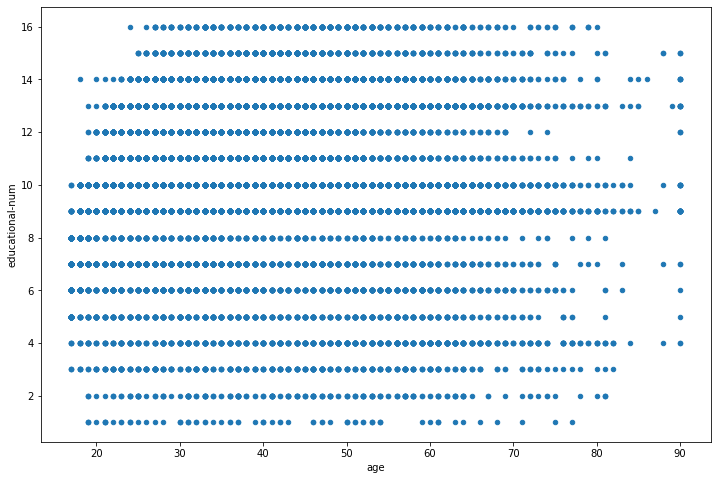

In [21]:
data_f.plot(kind='scatter', x='age', y='educational-num')

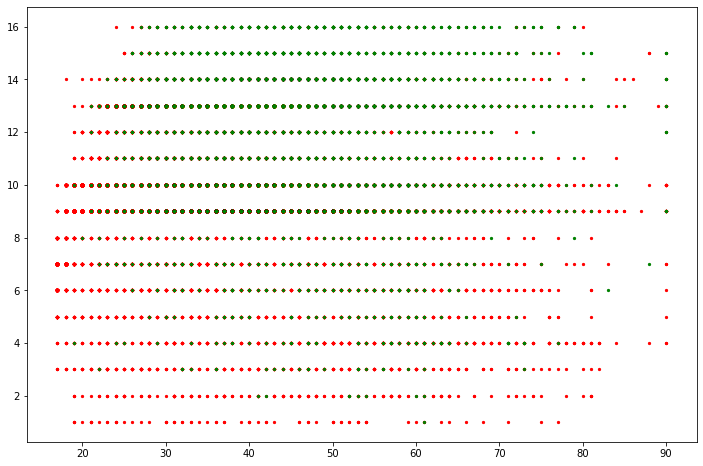

In [22]:
# А теперь то же самое, но по целевому значению
data_f_true = data_f.loc[((data['income'] == '>50K'))]
data_f_false = data_f.loc[((data['income'] != '>50K'))]
plt.scatter(data_f_false['age'], data_f_false['educational-num'], c='red', s=5)
plt.scatter(data_f_true['age'], data_f_true['educational-num'], c='green', s=5)

# Отличный результат, тут уже кое-что видно, но пока не очень четко. Уровень образования, очевидно, является одним из самых
# существенных факторов. Богатых и малообразованных значительно меньше, чем богатых образованных.

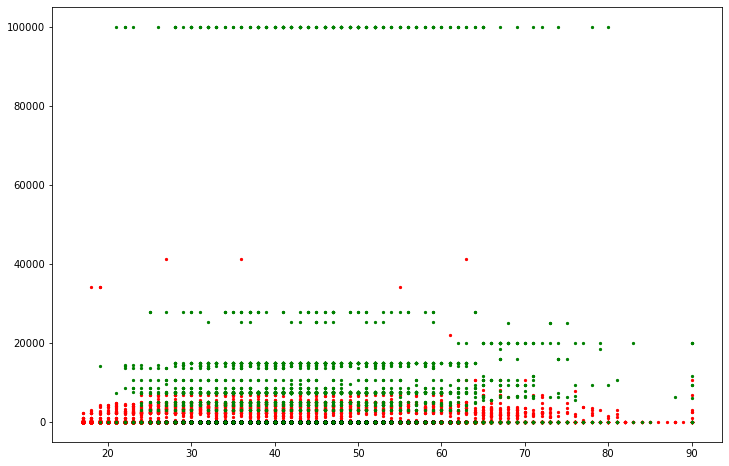

In [23]:
# А теперь то же самое, но сравним возраст и capital-gain
plt.scatter(data_f_false['age'], data_f_false['capital-gain'], c='red', s=5)
plt.scatter(data_f_true['age'], data_f_true['capital-gain'], c='green', s=5)

# График странный, но довольно любопытный по-своему
# во-первых видно, что данные в колонке capital-gain дискретные. Во-вторых виден большой провал в значениях этого параметра
# между 40000 и 100000, в основном данные сгруппированы в районе от 0 до 15000
# Много данных оказалось на значении 0, причем для обоих вариантов целевого значения

In [24]:
# Попробуем подключить библиотеку SeaBorn и посмотреть еще один вариант диаграмм
import seaborn as sns

education       10th       11th       12th    1st-4th    5th-6th    7th-8th  \
income                                                                        
<=50K      36.902717  33.678431  34.732210  38.742991  38.557377  39.212240   
>50K       45.914634  45.831461  46.139535  51.000000  44.318182  48.181818   

education        9th  Assoc-acdm  Assoc-voc  Bachelors  Doctorate    HS-grad  \
income                                                                         
<=50K      38.615987   40.252480  41.184192  40.875911  44.875862  40.301205   
>50K       45.368421   45.062814  44.386905  45.535242  48.167920  45.193709   

education    Masters  Preschool  Prof-school  Some-college  
income                                                      
<=50K      41.507583  36.746479    43.461140     38.055759  
>50K       45.960517  40.000000    49.381757     45.122111  


<AxesSubplot:xlabel='education', ylabel='income'>

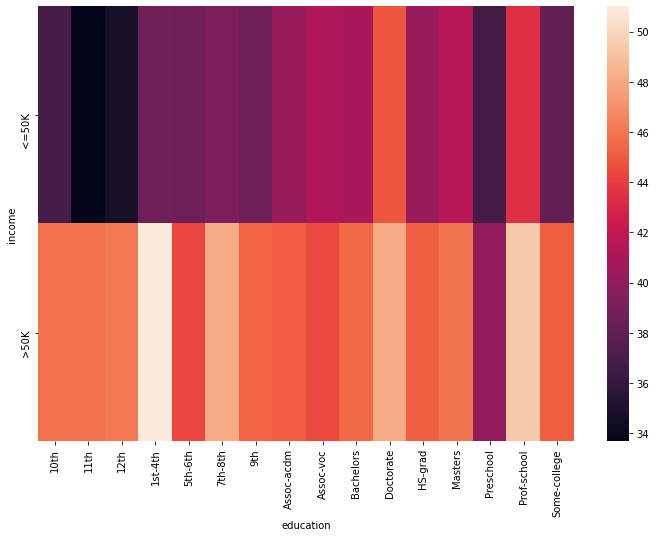

In [25]:
# Посмотрим heatmap и попробуем с помощью этого типа диаграммы посмотреть на то, есть ли какие-то уровни влияния
# среднего количества рабочих часов в неделю на целевой результат для людей с разным уровнем образования
income_by_age = data_f.pivot_table(
                        index='income', 
                        columns='education', 
                        values='hours-per-week', 
                        aggfunc={'hours-per-week':'mean'})

print(income_by_age)
sns.heatmap(income_by_age)
# Получили лишнее свидетельство того, что кто не работает, тот не ест.
# Но вообще график странный и, похоже, не очень информативный.

education   10th   11th  12th  1st-4th  5th-6th  7th-8th   9th  Assoc-acdm  \
age                                                                          
17         150.0  232.0  57.0      NaN      3.0      4.0  32.0         NaN   
18          43.0  219.0  73.0      NaN      5.0      6.0   9.0         NaN   
19          20.0   59.0  32.0      3.0      3.0     10.0  11.0         2.0   
20          13.0   32.0  17.0      1.0      7.0      5.0  17.0        13.0   
21          22.0   22.0   9.0      1.0      8.0      7.0  11.0        26.0   
..           ...    ...   ...      ...      ...      ...   ...         ...   
86           NaN    NaN   NaN      NaN      NaN      NaN   NaN         NaN   
87           NaN    NaN   NaN      NaN      NaN      NaN   NaN         NaN   
88           NaN    1.0   NaN      NaN      NaN      1.0   NaN         NaN   
89           NaN    NaN   NaN      NaN      NaN      NaN   NaN         NaN   
90           1.0    2.0   NaN      NaN      NaN      2.0   1.0  

<AxesSubplot:xlabel='education', ylabel='age'>

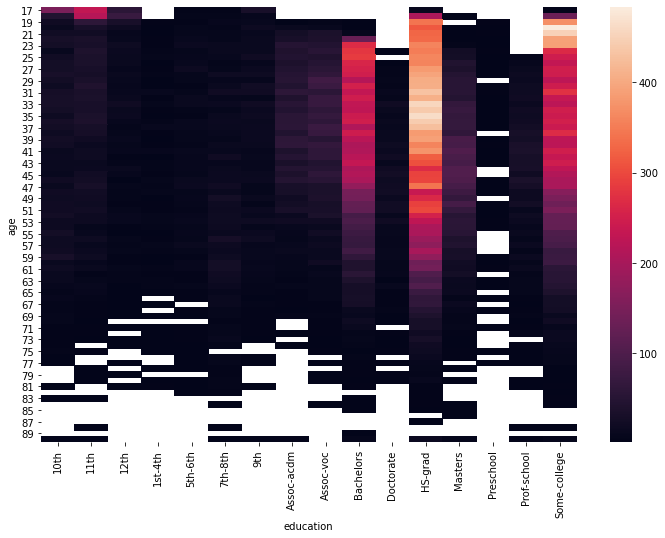

In [26]:
# Посмотрим, как соотносится возраст с образованием. Немного дурацкий эксперимент, 
# но он позволит увидеть распределение людей с разными уровнями образования в нашей выборке по их возрастам
education_by_age = data_f.pivot_table(
                        index='age', 
                        columns='education', 
                        values='hours-per-week', 
                        aggfunc={'hours-per-week': 'count'})

print(education_by_age)
sns.heatmap(education_by_age)

# На графике видно, что в самых представленных по уровню образования группах (Bachelors, HS-grads, some-college) заметны пики
# в общем-то более-менее совпадающие с текущим возрастом студентов, обучающихся на этих программах, и далее - длинные хвосты 
# более старших людей, так и остановившихся на этом уровне образования.
# Для предсказания итогового результата нам это вряд ли поможет, но было интересно еще и так взглянуть на данные.

In [27]:
#######################################
# Преобразуйте категориальные признаки
#######################################
# Вначале создаем копию датафрейма, чтобы последующими экспериментами не убить текущий датафрейм
data_new = data_f.copy()

# Проверим механизм категоризации данных. Если сработает - все категории обработаем таким образом
data_new["workclass"] = data_new["workclass"].astype('category')
data_new.info()

# Сработало. Далее - без комментариев

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              45222 non-null  int64   
 1   workclass        45222 non-null  category
 2   fnlwgt           45222 non-null  int64   
 3   education        45222 non-null  object  
 4   educational-num  45222 non-null  int64   
 5   marital-status   45222 non-null  object  
 6   occupation       45222 non-null  object  
 7   relationship     45222 non-null  object  
 8   race             45222 non-null  object  
 9   gender           45222 non-null  object  
 10  capital-gain     45222 non-null  int64   
 11  capital-loss     45222 non-null  int64   
 12  hours-per-week   45222 non-null  int64   
 13  native-country   45222 non-null  object  
 14  income           45222 non-null  object  
dtypes: category(1), int64(6), object(8)
memory usage: 5.2+ MB


In [28]:
data_new["marital-status"] = data_new["marital-status"].astype('category')
data_new["occupation"] = data_new["occupation"].astype('category')
data_new["relationship"] = data_new["relationship"].astype('category')
data_new["race"] = data_new["race"].astype('category')
data_new["gender"] = data_new["gender"].astype('category')
data_new["native-country"] = data_new["native-country"].astype('category')

data_new.info()

# Остались два поля. Про поле education мы уже выяснили, что его категориальный словарь уже хранится в колонке educational-num
# Второе поле - собственно целевое. С ним разберемся персонально.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              45222 non-null  int64   
 1   workclass        45222 non-null  category
 2   fnlwgt           45222 non-null  int64   
 3   education        45222 non-null  object  
 4   educational-num  45222 non-null  int64   
 5   marital-status   45222 non-null  category
 6   occupation       45222 non-null  category
 7   relationship     45222 non-null  category
 8   race             45222 non-null  category
 9   gender           45222 non-null  category
 10  capital-gain     45222 non-null  int64   
 11  capital-loss     45222 non-null  int64   
 12  hours-per-week   45222 non-null  int64   
 13  native-country   45222 non-null  category
 14  income           45222 non-null  object  
dtypes: category(7), int64(6), object(2)
memory usage: 3.4+ MB


In [29]:
# Ну а теперь добавим в датафрейм только значения из словарей категорий, а исходные колонки грохнем.
data_new["workclass_id"] = data_new["workclass"].cat.codes
data_new["marital-status_id"] = data_new["marital-status"].cat.codes
data_new["occupation_id"] = data_new["occupation"].cat.codes
data_new["relationship_id"] = data_new["relationship"].cat.codes
data_new["race_id"] = data_new["race"].cat.codes
data_new["gender_id"] = data_new["gender"].cat.codes
data_new["native-country_id"] = data_new["native-country"].cat.codes

data_new.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,hours-per-week,native-country,income,workclass_id,marital-status_id,occupation_id,relationship_id,race_id,gender_id,native-country_id
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,40,United-States,<=50K,2,4,6,3,2,1,38
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,50,United-States,<=50K,2,2,4,0,4,1,38
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,40,United-States,>50K,1,2,10,0,4,1,38
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,40,United-States,>50K,2,2,6,0,2,1,38
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,...,30,United-States,<=50K,2,4,7,1,4,1,38


In [ ]:
# Ну вот и все. Дальше будем формировать X, y и т.д. 

In [30]:
#######################################
# Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
#######################################
X = data_new[['age', 'workclass_id', 'fnlwgt', 'educational-num', 'marital-status_id', 'occupation_id', 
         'relationship_id', 'race_id', 'gender_id', 'hours-per-week', 'native-country_id']].copy()
#X.head()
data_new["income"] = data_new["income"].astype('category')
Y = data_new.income.cat.codes
Y.head()

from sklearn.model_selection import train_test_split
# Действуем в соответствии с заданием: для тестовых данных оставляем 20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Контроль. Смотрим параметры тестовой выборки
X_test.describe()

# Вроде бы ничего неадекватного не видно. Скорее всего, все норм и с X_train и уж тем более с Y

,age,workclass_id,fnlwgt,educational-num,marital-status_id,occupation_id,relationship_id,race_id,gender_id,hours-per-week,native-country_id
count,9045.000000,9045.000000,9.045000e+03,9045.000000,9045.000000,9045.000000,9045.000000,9045.000000,9045.000000,9045.000000,9045.000000
mean,38.436816,2.207076,1.898696e+05,10.058375,2.593477,5.963737,1.411609,3.686014,0.676838,40.918850,36.405860
std,13.331264,0.956665,1.053949e+05,2.608571,1.496724,4.030349,1.599238,0.826788,0.467710,12.047334,6.057252
min,17.000000,0.000000,1.930200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,1.175550e+05,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,40.000000,38.000000
50%,37.000000,2.000000,1.797720e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,40.000000,38.000000
75%,47.000000,2.000000,2.394390e+05,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,45.000000,38.000000
max,90.000000,6.000000,1.268339e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99.000000,40.000000


In [31]:
#######################################
# Обучите модели логистической регрессии и опорных векторов на обучающем множестве
#######################################
# Вначале - логистическая регрессия
from sklearn.linear_model import LogisticRegression

# Создаем с параметрами по умолчанию
data_logistic_regr = LogisticRegression(max_iter=1000)

data_logistic_regr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
y_test.mean()
# По получившемуся значению видно, что примерное соотношение людей с высоким и низким доходом при предсказании адекватно.

0.2435599778883361

In [ ]:
#######################################
# Для тестового множества предскажите уровень дохода и сравните с истинным значением, 
# посчитав точность предсказания моделей. Для этого используйте встроенную функцию score
#######################################

In [33]:
y_predict = data_logistic_regr.predict(X_test)
print(y_predict[:15])
print(y_test[:15])

# Считаем точность предсказания для логистической регрессии
log_score = data_logistic_regr.score(X_test, y_test)
print(f'\n\nТочность предсказания для логистической регрессии: {log_score}')

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
21762    0
21701    0
42663    1
42694    0
13590    0
47537    1
42284    1
2021     0
48236    0
46692    0
24799    0
32971    1
38457    0
3797     1
44599    1
dtype: int8


Точность предсказания для логистической регрессии: 0.7865118850193477


In [34]:
#######################################
# Обучите модели логистической регрессии и опорных векторов на обучающем множестве
#######################################
# Теперь займемся опорными векторами
from sklearn.svm import SVC

# создаем модель
data_scalar_vectors = SVC()

data_scalar_vectors.fit(X_train, y_train)


SVC()

In [ ]:
#######################################
# Для тестового множества предскажите уровень дохода и сравните с истинным значением, 
# посчитав точность предсказания моделей. Для этого используйте встроенную функцию score
#######################################

In [35]:
y_predict_sv = data_scalar_vectors.predict(X_test)
print(y_predict_sv[:15])
print(y_test[:15])

# Считаем точность предсказания для логистической регрессии
log_score_sv = data_scalar_vectors.score(X_test, y_test)
print(f'\n\nТочность предсказания для метода опорных векторов: {log_score_sv}')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
21762    0
21701    0
42663    1
42694    0
13590    0
47537    1
42284    1
2021     0
48236    0
46692    0
24799    0
32971    1
38457    0
3797     1
44599    1
dtype: int8


Точность предсказания для метода опорных векторов: 0.756440022111664


In [36]:
# Резюме: метод опорных векторов выдал более низкую точность, при этом обработка заняла значительно длительное время.
# Даже волноваться начал.